<a href="https://colab.research.google.com/github/musa-fe/Golden_Fibo/blob/main/GoldenFibo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simülasyon ve Modelleme Projesi

In [144]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d

# Teknik Analizde Kullanılan Altın Oran
Ben bu projede teknik analiz kısmında kullanılan altın oranın, fiyat hareketlerinde verdiğiği tepkiyi inceledim.

Teknik analiz kısmında kullanılan fib düzeltmesinde en dikkat çeken oran %61.8 oranıdır. Bu oran, altın oranla doğrudan ilişkilidir. Yani, Fibonacci dizisindeki iki ardışık sayının oranı alındığında (örneğin, 34/55) bu değer %61.8 olarak karşımıza çıkar. Altın oran, doğanın birçok yerinde karşımıza çıkan estetik bir orandır, bu yüzden finans dünyasında da çok fazla ilgi görüyor.

Şimdi bu projede bu seviyeyi test edip çalışıp çalışmadığını anlamaya çalışacağız.

# Altın oran arama algoritması

In [145]:
def golden_section_search(f, a, b, tol=1e-5, max_iter=100, find_max=True):
    R = (math.sqrt(5) - 1) / 2
    x1 = b - R * (b - a)
    x2 = a + R * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    iter_count = 0
    while abs(b - a) > tol and iter_count < max_iter:
        if (f1 < f2 and find_max) or (f1 > f2 and not find_max):
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + R * (b - a)
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - R * (b - a)
            f1 = f(x1)
        iter_count += 1

    x_opt = (a + b) / 2
    return x_opt, f(x_opt)

In [146]:
symbol = "BTC-USD"
data = yf.download(symbol, start="2024-11-10", end="2025-04-10")

data = data[['Close']].dropna().reset_index(drop=True)

close_prices = data['Close'].to_numpy().ravel()
days = np.arange(len(close_prices)).ravel()

[*********************100%***********************]  1 of 1 completed


In [147]:
f_interp = interp1d(days, close_prices, kind='cubic', fill_value="extrapolate")

#Max Bul


In [148]:
x_max, f_max = golden_section_search(f_interp, 0, len(close_prices) - 1, find_max=True)

#Min Bul

In [149]:
x_min, f_min = golden_section_search(f_interp, 0, len(close_prices) - 1, find_max=False)

In [150]:
x_max_real = np.argmax(close_prices)
f_max_real = close_prices[x_max_real]

x_min_real = np.argmin(close_prices)
f_min_real = close_prices[x_min_real]

#Altın Oran Seviyesi

In [151]:
golden_level = f_min + 0.618 * (f_max - f_min)

#Grafik

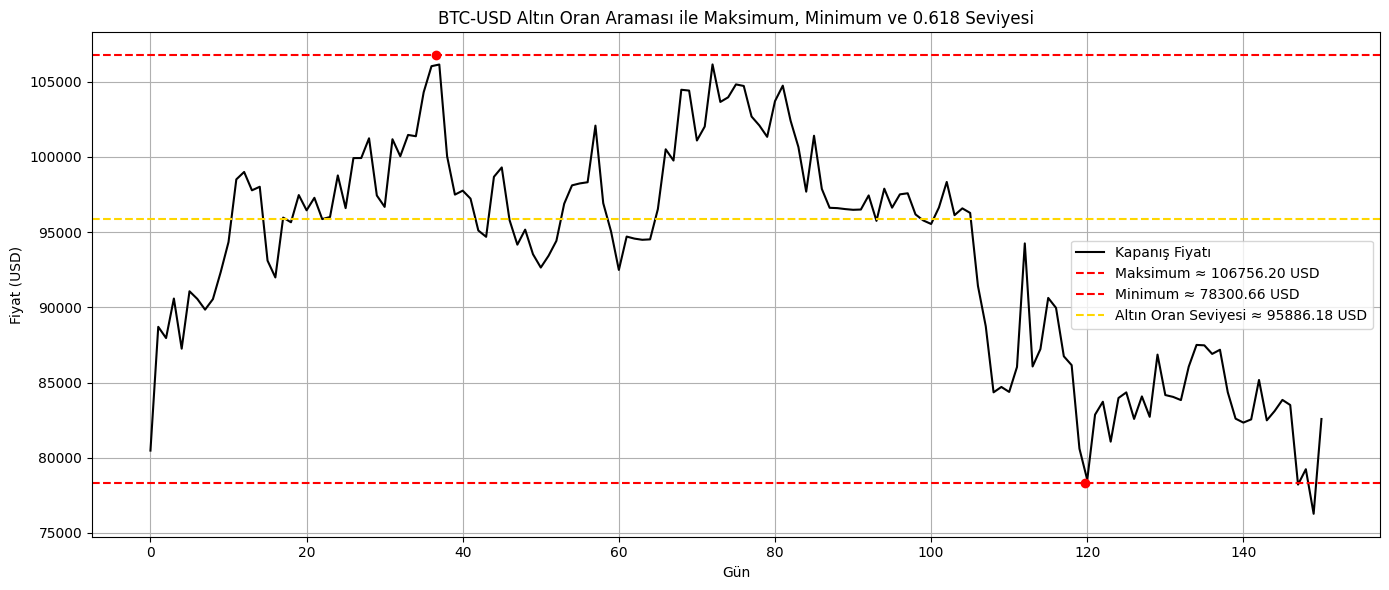

In [152]:
plt.figure(figsize=(14, 6))
plt.plot(days, close_prices, label='Kapanış Fiyatı', color='black')

plt.axhline(f_max, color='red', linestyle='--', label=f'Maksimum ≈ {f_max:.2f} USD')
plt.axhline(f_min, color='red', linestyle='--', label=f'Minimum ≈ {f_min:.2f} USD')
plt.axhline(golden_level, color='gold', linestyle='--', label=f'Altın Oran Seviyesi ≈ {golden_level:.2f} USD')

plt.scatter([x_max], [f_max], color='red', zorder=5)
plt.scatter([x_min], [f_min], color='red', zorder=5)

plt.title(f"{symbol} Altın Oran Araması ile Maksimum, Minimum ve 0.618 Seviyesi")
plt.xlabel("Gün")
plt.ylabel("Fiyat (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

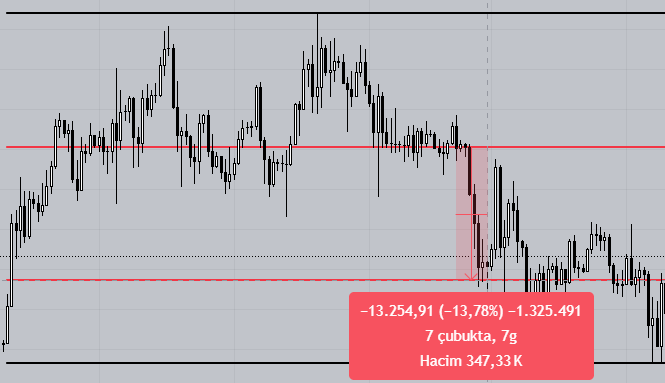

Güncel grafiktende teyit ettiğimizde, çektiğimiz fib düzeltmesinin ve fiyatların doğru olduğunu gözlemliyoruz

Burada asıl bakmamız gereken fiyat hareketi 96.274$ da gerçekleşmiş. İlk başta gelen yükseliz ve devamında yaşanılan akümülasyon seviyesini işaret ediyor. Ve bizim altın oran seviyesine denk gelen fiyat hareketi burayı kaybedince düşüş gösteriyor. Buda yaklaşık olarak %14 lük bir orana tekabül ediyor. Finansal piyasalar için oldukça iyi bir oran. Keza düşüş diğer bir altın oranımıza denk geliyor ve dikkatli incelenirse buradan da güzel bir tepki alıyor ve fiyat eski gücünü kazanmaya çalışıyor.

#Peki başka grafiklerde bu geçerli mi?

In [153]:
symbol = "ETH-USD"
data = yf.download(symbol, start="2024-02-22", end="2024-07-23")

data = data[['Close']].dropna().reset_index(drop=True)

close_prices = data['Close'].to_numpy().ravel()
days = np.arange(len(close_prices)).ravel()


[*********************100%***********************]  1 of 1 completed


In [154]:
f_interp = interp1d(days, close_prices, kind='cubic', fill_value="extrapolate")

In [155]:
x_max, f_max = golden_section_search(f_interp, 0, len(close_prices) - 1, find_max=True)
x_min, f_min = golden_section_search(f_interp, 0, len(close_prices) - 1, find_max=False)
x_max_real = np.argmax(close_prices)
f_max_real = close_prices[x_max_real]

x_min_real = np.argmin(close_prices)
f_min_real = close_prices[x_min_real]

golden_level = f_min + 0.618 * (f_max - f_min)

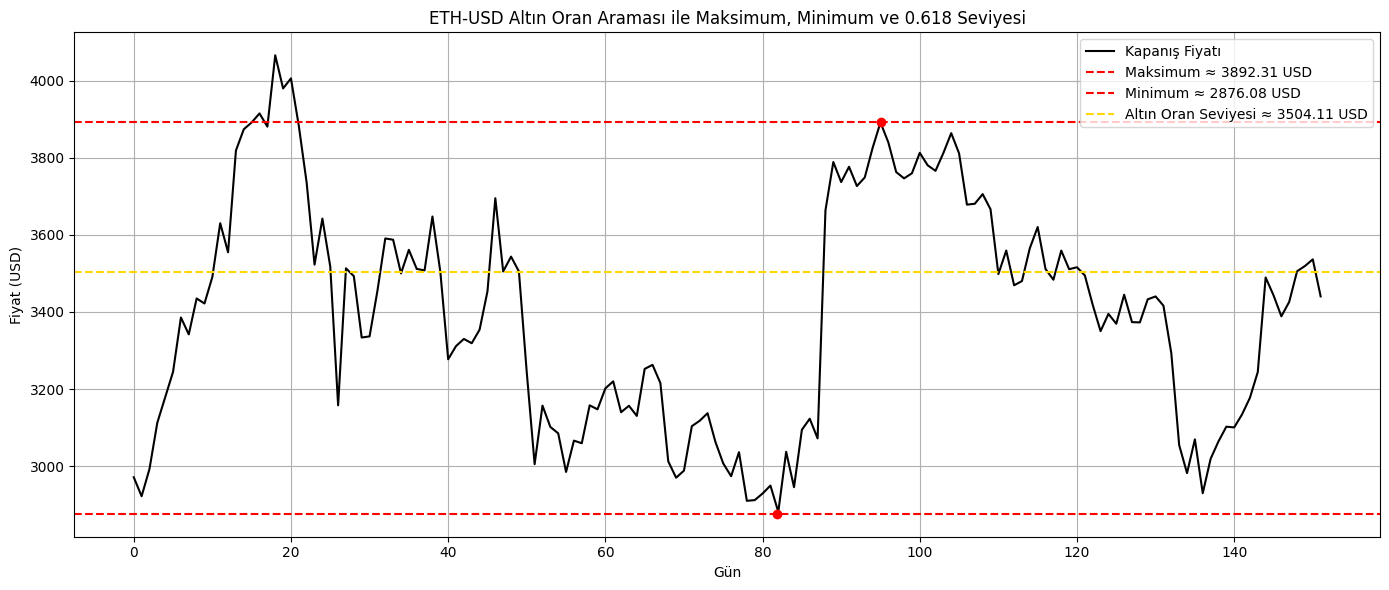

In [156]:
plt.figure(figsize=(14, 6))
plt.plot(days, close_prices, label='Kapanış Fiyatı', color='black')

plt.axhline(f_max, color='red', linestyle='--', label=f'Maksimum ≈ {f_max:.2f} USD')
plt.axhline(f_min, color='red', linestyle='--', label=f'Minimum ≈ {f_min:.2f} USD')
plt.axhline(golden_level, color='gold', linestyle='--', label=f'Altın Oran Seviyesi ≈ {golden_level:.2f} USD')

plt.scatter([x_max], [f_max], color='red', zorder=5)
plt.scatter([x_min], [f_min], color='red', zorder=5)

plt.title(f"{symbol} Altın Oran Araması ile Maksimum, Minimum ve 0.618 Seviyesi")
plt.xlabel("Gün")
plt.ylabel("Fiyat (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

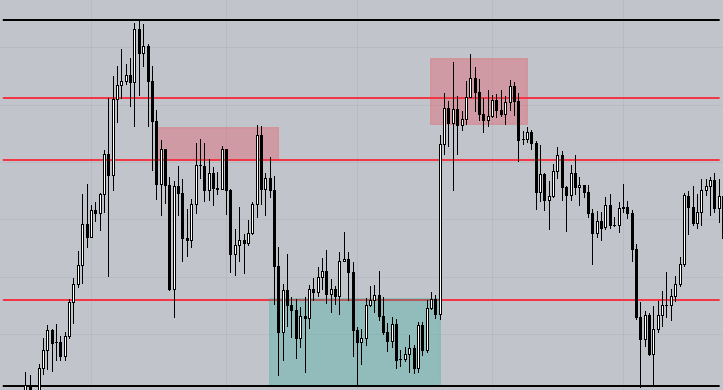

Bu grafikte de fiyat hareketinin ilk kırmuzı kutu bölgesi olan altın orandan birden fazla kez ret yediğini görüyoruz. Akabinde fiyat yeşil kutuya kadar bir düşüş sergiliyor. Orada yaptığı akümülasyon sonrası 2. sert tepki olan hareketini sergiliyor ve yine altın oranın bulunduğu kısma kadar bir yükseliş sergiliyor.

#SONUÇ

Finansal piyasalarda fiyat hareketlerini öngörmek çoğu zaman belirsizlik içerir. Ancak belirli teknik araçlar ve seviyeler aracılığıyla bu hareketleri analiz etmek mümkün hale gelebilir. Bu çalışmada, özellikle altın oran  etrafında oluşan fiyat tepkileri incelenmiştir.

Fibonacci seviyeleri, hem borsa hem de kripto para piyasalarında yaygın olarak kullanılan teknik analiz araçları arasında yer alır. Fiyatın bu oranlara karşı gösterdiği tepkiler, belirli seviyelerde destek veya direnç oluşumlarını gözlemlememize olanak tanımaktadır. Bu kapsamda yaptığım analizlerde, altın oranlara denk gelen seviyelerin genellikle yüksek oranda fiyat tepkisi aldığı gözlemlenmiştir.

Bu projedeki amacım, Fibonacci düzeltme seviyesini Python ile sistematik olarak hesaplayıp grafik üzerinde göstermek. Böylece teknik analizde sıkça kullanılan bu kavramın, sayısal analizle desteklenmesini ve uygulanabilirliğinin gösterilmesini hedefledim. YTD .d